# Cluster Analysis

We performed customer segmentation using K-Means clustering. Now we shall analyse each of them to understand why the customer churns.

In [152]:
#Importing necessary modules for Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [153]:
#Read in the cluster dataset
df = pd.read_csv('Clusters.csv')

In [154]:
#drop unwanted index column
df.drop('Unnamed: 0', axis =1  , inplace = True)

In [155]:
#Check first few rows of the dataset
df.head()

,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,Total_Charge,day_rate,eve_rate,night_rate,intl_rate,CLUSTER
0,0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,3,2.70,1,no,75.56,0.170011,0.085005,0.044994,0.270000,2
1,1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,3,3.70,1,no,59.24,0.169988,0.085013,0.045008,0.270073,2
2,2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,5,3.29,0,no,62.29,0.170008,0.084983,0.045018,0.269672,1
3,3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,7,1.78,2,no,66.80,0.170007,0.084976,0.044997,0.269697,3
4,4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,3,2.73,3,no,52.09,0.170006,0.085030,0.044997,0.270297,4


# One Hot encoding

In [156]:
#We need to convert categorical values into numerical labels so that they are processed by the algorithm correctly
categorical = df.select_dtypes(exclude=['float64', 'int64'])

In [157]:
#Categorical column names
categorical.columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

In [158]:
#Convert categorical variables by adding numeric labels
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelEnc=LabelEncoder()

cat_vars=['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

for col in cat_vars:
    df[col]=labelEnc.fit_transform(df[col])

In [159]:
#check the first few rows
df.head()

,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,Total_Charge,day_rate,eve_rate,night_rate,intl_rate,CLUSTER
0,0,16,128,1,0,1,25,265.1,110,45.07,...,3,2.70,1,0,75.56,0.170011,0.085005,0.044994,0.270000,2
1,1,35,107,1,0,1,26,161.6,123,27.47,...,3,3.70,1,0,59.24,0.169988,0.085013,0.045008,0.270073,2
2,2,31,137,1,0,0,0,243.4,114,41.38,...,5,3.29,0,0,62.29,0.170008,0.084983,0.045018,0.269672,1
3,3,35,84,0,1,0,0,299.4,71,50.90,...,7,1.78,2,0,66.80,0.170007,0.084976,0.044997,0.269697,3
4,4,36,75,1,1,0,0,166.7,113,28.34,...,3,2.73,3,0,52.09,0.170006,0.085030,0.044997,0.270297,4


# Dividing into clusters

We divide the dataset based on the cluster label

In [160]:
c1 = df[df['CLUSTER'] == 0]

In [161]:
c2 = df[df['CLUSTER'] == 1]

In [162]:
c3 = df[df['CLUSTER'] == 2]

In [163]:
c4 = df[df['CLUSTER'] == 3]

In [164]:
c5 = df[df['CLUSTER'] == 4]

For each cluster we will first create a high accuray random forest model to know which customers are churning. 

Then we will create a more explanatory Decision tree model which will give us the reasons why the customer is churning. 

In the decision tree model we will use only those features which affect churn the most , these features are obtained from the random forest model.

# Cluster 1 

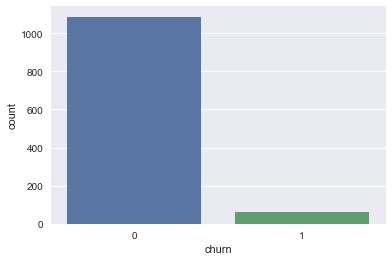

In [246]:
sns.countplot(c1['churn'])

In [247]:
c1['churn'].value_counts()

0    1087
1      64
Name: churn, dtype: int64

We have class imbalance problem as the churn customers are much less than those who dont churn

We will use a sythentic oversampling technique to remove this imbalance and then create a model on that

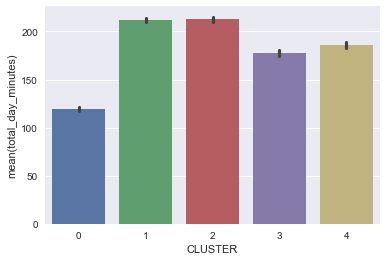

In [248]:
sns.barplot(df['CLUSTER'] , df['total_day_minutes'])

In [167]:
X1 = c1.drop(['churn'] , axis = 1)
y1 = c1['churn']

In [168]:
#importing oversampling module
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled1, y_resampled1 = ada.fit_sample(X1, y1)

In [169]:
#Dividing our dataset into test and train
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled1, y_resampled1, test_size=0.3 , random_state = 101)

We will use random forest algorithm to find out the most important variables affecting churn

In [170]:
#importing random forest classification module
from sklearn.ensemble import RandomForestClassifier

In [171]:
#instantiate the model
rfc1  = RandomForestClassifier()

In [172]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Now to get the predictions from our model

In [173]:
#importing libraries for classification report
from sklearn.metrics import classification_report

In [174]:
preds1 = rfc1.predict(X_test)

In [175]:
print(classification_report(y_test,preds1))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98       329
          1       0.98      0.98      0.98       324

avg / total       0.98      0.98      0.98       653



Classification models best measure is the AUC score

In [176]:
#importing modules for auc score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds1)

0.98159874666966873

-----------------------------  Decision Tree - To get the conditions for churn ---------------------------------

In [177]:
#Model to get the feature importance
rfc1.fit(X1, y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Feature Importance

In [178]:
#Top 10 most important features affecting churn
pd.Series(rfc1.feature_importances_, index = X1.columns).sort_values(ascending = False).head(10)

international_plan    0.190599
total_intl_charge     0.095564
total_intl_calls      0.087990
total_intl_minutes    0.061466
total_eve_charge      0.049253
total_eve_calls       0.042497
night_rate            0.039944
total_eve_minutes     0.037400
total_day_calls       0.034417
total_night_calls     0.031528
dtype: float64

In [249]:
# X and y variables for the decision tree model
X11 = c1[['international_plan',   
'total_intl_charge',     
'total_intl_calls',      
'total_intl_minutes',    
'total_eve_charge',     
'total_eve_calls',       
'night_rate',           
'total_eve_minutes',     
'total_day_calls',      
'total_night_calls']]

y11 = c1['churn']

In [250]:
#importing modules for decision tree and its plot
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [251]:
#instantiate the model
dtclf1  = DecisionTreeClassifier(max_depth = 4)

In [252]:
#Fit the decision tree model
dtclf1.fit(X11 , y11)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [254]:
tree.export_graphviz(dtclf1,out_file='tree1.dot' , label = None ,feature_names = ['international_plan',   
'total_intl_charge',     
'total_intl_calls',      
'total_intl_minutes',    
'total_eve_charge',     
'total_eve_calls',       
'night_rate',           
'total_eve_minutes',     
'total_day_calls',      
'total_night_calls'] ,class_names = True ) 

We visualize the Decision Tree and find that:

       1) Customers with international plan and having total_intl_minutes > 13.0 are likely to churn
       2) Customers with international plan , having total_intl_minutes <= 13.0 and having total_intl_calls < 3 are likely to churn 

# Insights and recommendations for Cluster 1

These customers have low day usage

Main reasons for churn is international usage

1) We can offer an international plan to the customer with 5 free calls

2) Customers with low international minutes ,we can offer free international minutes

We can offer these plans first to those customers who are more valuable , i.e have more total charges per month

# Cluster 2

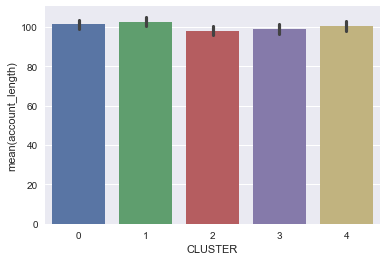

In [255]:
sns.barplot(df['CLUSTER'] , df['account_length'])

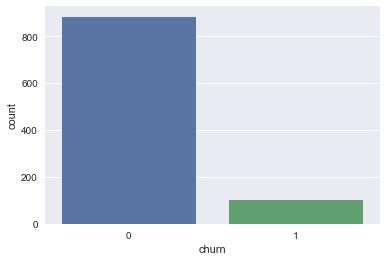

In [256]:
sns.countplot(c2['churn'])

In [257]:
c2['churn'].value_counts()

0    883
1    103
Name: churn, dtype: int64

In [258]:
X2 = c2.drop(['churn','index'] , axis = 1)
y2 = c2['churn']

In [259]:
#importing oversampling module
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled2, y_resampled2 = ada.fit_sample(X2, y2)

In [260]:
#Dividing our dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_resampled2, y_resampled2, test_size=0.3 , random_state = 101)

In [261]:
#instantiate the random forest model
rfc2 = RandomForestClassifier()

In [262]:
rfc2.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Now to get the predictions from our model

In [263]:
preds2 = rfc2.predict(X_test)

In [264]:
print(classification_report(y_test,preds2))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97       281
          1       1.00      0.93      0.96       243

avg / total       0.97      0.97      0.97       524



In [265]:
roc_auc_score(y_test, preds2)

0.96324121670108231

In [266]:
#RF Model to get the feature importance
rfc2.fit(X2, y2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Feature Importance

In [267]:
pd.Series(rfc2.feature_importances_, index = X2.columns).sort_values(ascending = False).head(10)

Total_Charge          0.183103
international_plan    0.136402
total_day_charge      0.103265
total_day_minutes     0.084668
total_intl_charge     0.084219
total_intl_calls      0.040410
day_rate              0.038831
total_eve_charge      0.038776
account_length        0.033494
total_intl_minutes    0.028979
dtype: float64

-----------------------------  Decision Tree - To get the conditions for churn ---------------------------------

In [268]:
X22 = c2[['Total_Charge',        
'international_plan',    
'total_day_charge',     
'total_day_minutes',   
'total_intl_charge',    
'total_intl_calls',      
'day_rate',             
'total_eve_charge',      
'account_length',     
'total_intl_minutes']]

y22 = c2['churn']

In [269]:
dtclf2  = DecisionTreeClassifier(max_depth = 4)

In [270]:
dtclf2.fit(X22 , y22)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [271]:
tree.export_graphviz(dtclf2,out_file='tree2.dot' , label = None ,feature_names = ['Total_Charge',        
'international_plan',    
'total_day_charge',     
'total_day_minutes',   
'total_intl_charge',    
'total_intl_calls',      
'day_rate',             
'total_eve_charge',      
'account_length',     
'total_intl_minutes'] , class_names = True )

We visualize the Decision Tree and find that:

       1) Customers with no international plan , with Total_Charge > 73.97 and day rate > 0.17 are likely to churn.
       2) Customers with international plan , with Total_Charge < 73.97 , total_intl_charge > 3.535 are likely to churn.
 

#  Insights and recommendations for Cluster 2

These customers have longest average account length 

Main reasons for churn Total Charge, International usage , Total day charge

1) Customers who do not have an international plan but have a total charge > 73.97 can be offered day rate discounts

2) Customers with international plans with total charge < 73.97 can be offered discounted international calling.




# Customer Segment 3

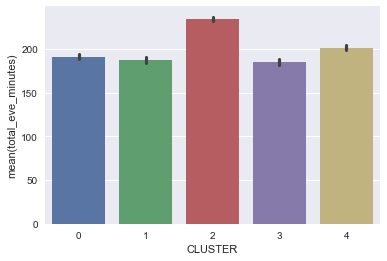

In [272]:
sns.barplot(df['CLUSTER'] , df['total_eve_minutes'])

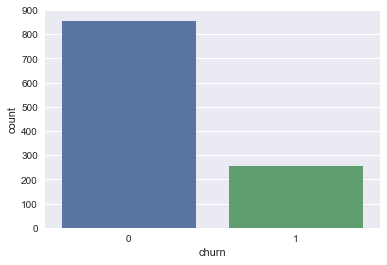

In [273]:
sns.countplot(c3['churn'])

In [274]:
c3['churn'].value_counts()

0    856
1    257
Name: churn, dtype: int64

In [275]:
X3 = c3.drop(['churn','index'] , axis = 1)
y3 = c3['churn']

In [276]:
#importing oversampling module
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled3, y_resampled3 = ada.fit_sample(X3, y3)

In [277]:
#Dividing our dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_resampled3, y_resampled3, test_size=0.3 , random_state = 101)

In [278]:
#instantiate the random forest model
rfc3 = RandomForestClassifier()

In [279]:
rfc3.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Now to get the predictions from our model

In [280]:
preds3 = rfc3.predict(X_test)

In [281]:
print(classification_report(y_test,preds3))

             precision    recall  f1-score   support

          0       0.95      0.98      0.96       273
          1       0.98      0.93      0.96       230

avg / total       0.96      0.96      0.96       503



In [282]:
roc_auc_score(y_test, preds3)

0.95823379519031693

In [283]:
#RF Model to get the feature importance
rfc3.fit(X3, y3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Feature Importance

In [284]:
pd.Series(rfc3.feature_importances_, index = X3.columns).sort_values(ascending = False).head(10)

Total_Charge             0.383617
total_day_minutes        0.107164
total_day_charge         0.092094
voice_mail_plan          0.069577
number_vmail_messages    0.061644
total_intl_minutes       0.041894
total_eve_minutes        0.026589
international_plan       0.018686
total_eve_calls          0.016439
total_night_charge       0.016178
dtype: float64

------------------------ Decision Tree - To get the conditions for churn ------------------------

In [286]:
X33 = c3[['Total_Charge',
'total_day_minutes',        
'total_day_charge',         
'voice_mail_plan',         
'number_vmail_messages',   
'total_intl_minutes',      
'total_eve_minutes',        
'international_plan',      
'total_eve_calls',         
'total_night_charge']]

y33 = c3['churn']

In [287]:
dtclf3  = DecisionTreeClassifier(max_depth = 4)

In [288]:
dtclf3.fit(X33 , y33)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [289]:
tree.export_graphviz(dtclf3,out_file='tree3.dot' , label = None ,feature_names = ['Total_Charge',
'total_day_minutes',        
'total_day_charge',         
'voice_mail_plan',         
'number_vmail_messages',   
'total_intl_minutes',      
'total_eve_minutes',        
'international_plan',      
'total_eve_calls',         
'total_night_charge'] ,class_names = True )

We visualize the Decision Tree and find that:

1) Customers which have a total charge greater than 74.23 with no VoiceMail plan are likely to churn

2) Customers with total charge less than 74.23 , having international plan , but having total_intl_minutes > 13.0 are likely to churn

#  Insights and recommendations for Cluster 3

These customers are 

Main reasons for churn are customer service calls , total day minutes

1) Customers which have a total charge greater than 74.23 are valuable customers and can be offered discounted/free Voicemail plans

2) Customers with totalcharge less than 74.23 , with international plan , can be offered free international minutes above 13 minutes



# Customer Segment 4

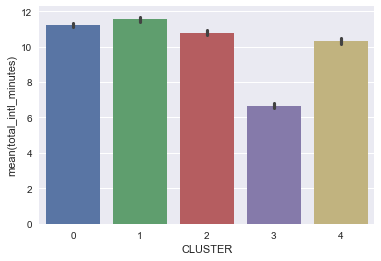

In [290]:
sns.barplot(df['CLUSTER'] , df['total_intl_minutes'])

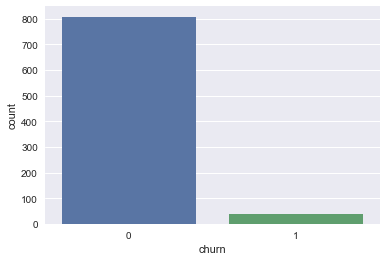

In [291]:
sns.countplot(c4['churn'])

In [292]:
c4['churn'].value_counts()

0    808
1     37
Name: churn, dtype: int64

In [293]:
X4 = c4.drop(['churn','index'] , axis = 1)
y4 = c4['churn']

In [294]:
#importing oversampling module
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled4, y_resampled4 = ada.fit_sample(X4, y4)

In [295]:
#Dividing our dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_resampled4, y_resampled4, test_size = 0.3 , random_state = 101)

In [296]:
#instantiate the random forest model
rfc4 = RandomForestClassifier()

In [297]:
rfc4.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Now to get the predictions from our model

In [298]:
preds4 = rfc4.predict(X_test)

In [299]:
print(classification_report(y_test,preds4))

             precision    recall  f1-score   support

          0       0.97      0.99      0.98       237
          1       0.99      0.98      0.98       248

avg / total       0.98      0.98      0.98       485



In [300]:
roc_auc_score(y_test, preds4)

0.98157411188240096

In [301]:
#RF Model to get the feature importance
rfc4.fit(X4 , y4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Feature Importance

In [302]:
pd.Series(rfc4.feature_importances_, index = X4.columns).sort_values(ascending = False).head(10)

Total_Charge          0.142936
total_intl_calls      0.112170
international_plan    0.092283
total_day_minutes     0.061774
account_length        0.060535
total_eve_minutes     0.053921
total_day_charge      0.048023
eve_rate              0.041690
total_night_charge    0.041521
total_night_calls     0.040729
dtype: float64

-------------------------    Decision Tree - To get the conditions for churn ----------------------------

In [303]:
X44 = c4[['Total_Charge',          
'total_intl_calls',      
'international_plan',    
'total_day_minutes',    
'account_length',       
'total_eve_minutes',     
'total_day_charge',      
'eve_rate',             
'total_night_charge',    
'total_night_calls']]

y44 = c4['churn']

In [304]:
dtclf4  = DecisionTreeClassifier(max_depth = 4)

In [305]:
dtclf4.fit(X44 , y44)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [306]:
tree.export_graphviz(dtclf4,out_file='tree4.dot' , label = None ,feature_names = ['Total_Charge',          
'total_intl_calls',      
'international_plan',    
'total_day_minutes',    
'account_length',       
'total_eve_minutes',     
'total_day_charge',      
'eve_rate',             
'total_night_charge',    
'total_night_calls'] ,class_names = True )

We visualize the Decision Tree and find that:

       1) Customers with Total_Charge > 74.13, total_night_charge < 10.76 are more likely to churn
       2) Customers with Total_Charge < 74.13 , having international plan but having total_intl_calls < 3 are likely to churn

# Insights and recommendations for Cluster 4

These customers are 

Main reasons for churn are Total_Charge,total_night_charge , total_intl_calls

1) Customers with Total_Charge > 74.13 having night charge < 10.76 can be offered discounted night calling

2) Customers with Total_Charge < 74.13 having international plan can be offered 4 free international calls



# Customer Segment 5

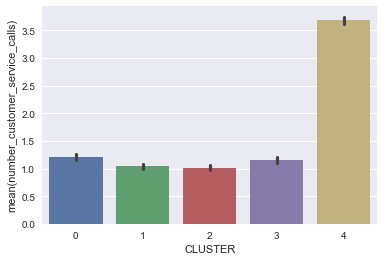

In [307]:
sns.barplot(df['CLUSTER'] , df['number_customer_service_calls'])

Customer Segment 5 has the lowest revenue and needs the most attention

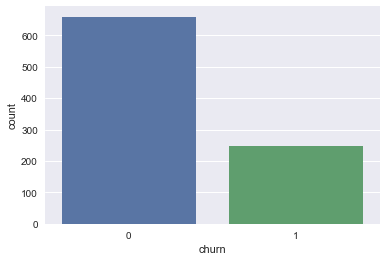

In [308]:
sns.countplot(c5['churn'])

In [309]:
c5['churn'].value_counts()

0    659
1    246
Name: churn, dtype: int64

In [310]:
#importing oversampling module
X5 = c5.drop(['churn','index'] , axis = 1)
y5 = c5['churn']

In [311]:
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_resampled5, y_resampled5 = ada.fit_sample(X5, y5)

In [312]:
#Dividing our dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X_resampled5, y_resampled5, test_size = 0.3 , random_state = 101)

In [313]:
#instantiate the random forest model
rfc5 = RandomForestClassifier()

In [314]:
rfc5.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Now to get the predictions from our model

In [315]:
preds5 = rfc5.predict(X_test)

In [316]:
print(classification_report(y_test,preds5))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97       204
          1       0.98      0.96      0.97       195

avg / total       0.97      0.97      0.97       399



In [317]:
roc_auc_score(y_test, preds5)

0.97224736048265459

Feature Importance

In [318]:
#RF Model to get the feature importance
rfc5.fit(X5 , y5)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [319]:
pd.Series(rfc5.feature_importances_, index = X5.columns).sort_values(ascending = False).head(10)

Total_Charge                     0.243339
number_customer_service_calls    0.194837
total_day_minutes                0.116373
total_eve_charge                 0.031177
night_rate                       0.031176
total_intl_minutes               0.028730
total_eve_calls                  0.027498
total_eve_minutes                0.026521
eve_rate                         0.024619
total_day_charge                 0.024204
dtype: float64

-----------------------------  Decision Tree - To get the conditions for churn ---------------------------------

In [320]:
X55 = c5[['Total_Charge',                  
'number_customer_service_calls',    
'total_day_minutes',                
'total_eve_charge',                
'night_rate',                      
'total_intl_minutes',               
'total_eve_calls',                 
'total_eve_minutes',                
'eve_rate',                         
'total_day_charge']]

y55 = c5['churn']

In [321]:
dtclf5  = DecisionTreeClassifier(max_depth = 4)

In [322]:
dtclf5.fit(X55,y55)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [323]:
tree.export_graphviz(dtclf5,out_file='tree5.dot', label = None ,feature_names = ['Total_Charge',                  
'number_customer_service_calls',    
'total_day_minutes',                
'total_eve_charge',                
'night_rate',                      
'total_intl_minutes',               
'total_eve_calls',                 
'total_eve_minutes',                
'eve_rate',                         
'total_day_charge'] ,class_names = True )

We visualize the Decision Tree and find that:

       1) Customers with number_customer_service_calls > 4 and Total_Charge <= 56.73 are more likely to churn
       2) Customers with number_customer_service_calls < 4 , Total_Charge > 73.92 and total_day_minutes <= 271.85 are more likely to churn
 

# Insights and recommendations for Cluster 5

These customers are

Main reason for churn is international plan

1) Customers with total_charge < 56.73 can be given priortized customer service based on how valuable the customer is

2) Customers with total_charge > 73.92  but less then 271.8 day minutes should be offered free day minutes

# Revenue savings from avoiding customer churn

In [324]:
#Monthly Savings
df[df['churn'] ==1]['Total_Charge'].sum()

46307.80000000001

Potential annual Savings of $555693.6 if we avoid customer churn